# CSC421 Assignment 4 - Part II Hidden Markov Models (5 points) #
### Author: George Tzanetakis 

This notebook is based on the supporting material for topics covered in **Chapter 15 Probabilistic Reasoning over Time** from the book *Artificial Intelligence: A Modern Approach.* 

This part relies on the provided notebook code probability.ipynb, viterbi.ipynb as well as the notebook for Markov Chains and HMMs that is under Resources and was presented in class (this notebook requires the hmmlearn Python package). 

```
Misunderstanding of probability may be the greatest of all impediments
to scientific literacy.

Gould, Stephen Jay
```



## Introduction 

Hidden Markov Models are probabilistic models that capture uncertainty over time. In this assignment you will become familiar with the underlying concepts by using two different implementations of HMMs - one based on hmmlearn and the other provided by the book authors. 

## Question 4.2A (Minimum) CSC421 -  (1 point, CSC581C - 0 points) 

Use the umbrella HMM described by the book and implemented in the probability.ipynb notebook with the code in the Markov Chain and HMM notebook. Use the hmmlearn version rather than the one that is implemented from "scratch". Generate 30 random samples and display with characters both the hidden states and observations. More specifically change the state2color and obs2color functions to display characters instead of colors. Use R and S for a rainy day and a not rainy (sunny) day and u and underscore(_) for the umbrella. So for example: 

Ru,Ru,R_,S_,Su 
Would correspond to: 
```
Day1: Rainy with umbrella 
Day2: Rainy with umbrella 
Day3: Rainy with no umbrella 
Day4: Sunny with no umbrella 
Day5: Sunny with umbrella 
```

In [187]:
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from hmmlearn import hmm 

transmat = np.array([[0.7, 0.3], 
                    [0.3, 0.7]])

start_prob = np.array([1.0, 0.0])

emission_probs = np.array([[0.9,0.1], 
                           [0.2,0.8]])

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = start_prob 
model.transmat_ = transmat 
model.emissionprob_ = emission_probs

# sample the model - X is the observed values 
# and Z is the "hidden" states 
X, Z = model.sample(30)

# we have to re-define state2color and obj2color as the hmm-learn 
# package just outputs numbers for the states 
state2color = {} 
state2color[0] = 'R'
state2color[1] = 'S'
weather = [state2color[x] for x in Z]

obs2color = {} 
obs2color[0] = 'u'
obs2color[1] = '_'
samples = [item for sublist in X for item in sublist]
umbrella = [obs2color[x] for x in samples]

for i,w in enumerate(weather):
    weather[i] = w + umbrella[i]

print(', '.join(weather))

Ru, Ru, Ru, Ru, Ru, Ru, Ru, S_, Ru, S_, Ru, Ru, R_, S_, S_, Su, S_, Ru, Su, Ru, R_, Ru, Ru, R_, Ru, S_, S_, S_, S_, Ru


## Question 4.2B (Minimum) (CSC421 - 1 point, CSC581C - 0 point) 


Express the weather example in terms of a transition and sensor model following the conventions of the HMM implementation provided in probability.ipynb from the AIMA authors. The implementation of HMMs in the AIMA notebook is limited and only supports a sensor model with a binary variable. Convert the 4 sky colors to a binary variable as follows (you can think of it as blue sky (True or False): 

```
[0.6, 0.3, 0.1, 0.0] will become ]0.9, 0.1] 
amd 
[0.0, 0.1, 0.4, 0.5] will become [0.1, 0.9] 
```

Suppose you have the following evidence for Blue Sky: 
```
evidence = [True, False, False, True, True]
```

What is the maximum likelihood sequence of hidden states (sunny or cloudy) for this evidence? 
Calculate and display the answer using the viterbi algorithm from viterbi.ipynb. 


In [188]:
from probability import*
from tabulate import tabulate

weather_transition_model = [[0.7, 0.3], [0.2, 0.8]]
weather_sensor_model = [[0.9, 0.1], [0.1, 0.9]]
weather_hmm = HiddenMarkovModel(weather_transition_model, weather_sensor_model)

weather_evidence = [True, False, False, True, True]
sequence, probabilities = rounder(viterbi(weather_hmm, weather_evidence))

print(sequence, probabilities, '\n')

for i,w in enumerate(sequence):
    if w == 1: 
        sequence[i] = 'Sunny'
    else: 
        sequence[i] = 'Cloudy'

Headers = ['','Sequence', 'Probability']
Data = [['1', sequence[0], probabilities[0]],
        ['2', sequence[1], probabilities[1]],
        ['3', sequence[2], probabilities[2]],
        ['4', sequence[3], probabilities[3]],
        ['5', sequence[4], probabilities[4]]       
       ]

print('Maximum likelihood Sequence')
print(tabulate(Data,Headers,tablefmt="fancy_grid", numalign = "right"))

[1, 0, 0, 1, 1] [0.8804, 0.1585, 0.1141, 0.0308, 0.0194] 

Maximum likelihood Sequence
╒════╤════════════╤═══════════════╕
│    │ Sequence   │   Probability │
╞════╪════════════╪═══════════════╡
│  1 │ Sunny      │        0.8804 │
├────┼────────────┼───────────────┤
│  2 │ Cloudy     │        0.1585 │
├────┼────────────┼───────────────┤
│  3 │ Cloudy     │        0.1141 │
├────┼────────────┼───────────────┤
│  4 │ Sunny      │        0.0308 │
├────┼────────────┼───────────────┤
│  5 │ Sunny      │        0.0194 │
╘════╧════════════╧═══════════════╛


# Question 2C (Expected) 1 point 

Consider the umbrella HMM implemented using hmmlearn as you did in question 4.2A. Generate 1000 samples i.e you will have a sequence of 1000 states and corresponding sequence of 10000 observations. One way to view this data is to consider it as a classification problem where your feature is whether there is an umbrella or not and your predicted class is whether it is rainy or not. 

Write a function called classification_accuracy that takes as input two lists of states and returns the number of states that are the same in both lists as a percentage. 

Now consider the sequence of states you generated as ground truth. Using the specified umbrella HMM predict what sequence of states is the most likelily to have generated the generated sequence of observations. This is similar to the visual comparison of the original and predicted states in the provided notebook. Here we quantify this. 

What is the classification accuracy in this case? 

Now consider a new HMM in which the transition model for the umbrella example has 0.5 for all probability values. 
Effectively this disregards any temporal dependenices and each time step is decided independently. In fact it corresponds to a Naive Bayes classifier with a single feature which is whether umbrella is true or false. 

What is the classification accuracy in this case? 


In [189]:
def classification_accuracy (list1, list2):
    if len(list1) != len(list2): return 'Error: lists are different lengths' 
    length = len(list1)
    counter = 0
    for i,w in enumerate(list1):
        if w == list2[i]:
            counter += 1
        #print(w, list2[i], counter)
    return counter/length

trans_model_1 = [[0.7, 0.3], [0.3, 0.7]]
trans_model_2 = [[0.5, 0.5], [0.5, 0.5]]
sens_model_1 = [[0.9, 0.1], [0.2, 0.8]]

model.transmat_ = trans_model_1
X, Z = model.sample(1000)
samples = [item for sublist in X for item in sublist]
for i, w in enumerate(samples):
    if w == 1: samples[i] = True
    else: samples[i] = False 
weather_hmm = HiddenMarkovModel(trans_model_1, sens_model_1)
sequence, probabilities = rounder(viterbi(weather_hmm, samples))
print('Case 1: {:.2f}% accuracy.'.format(classification_accuracy(Z, sequence)*100))


model.transmat_ = trans_model_2
X, Z = model.sample(1000)
samples = [item for sublist in X for item in sublist]
for i, w in enumerate(samples):
    if w == 1: samples[i] = True
    else: samples[i] = False 
weather_hmm = HiddenMarkovModel(trans_model_2, sens_model_1)
sequence, probabilities = rounder(viterbi(weather_hmm, samples))
print('Case 2: {:.2f}% accuracy.'.format(classification_accuracy(Z, sequence)*100))

#classification accuracies are very similar because the transition model does not affect
    #classification of hidden state from observed state.

Case 1: 82.20% accuracy.
Case 2: 78.90% accuracy.


# QUESTION 2D (Expected ) 1 point

Modify the code provided in the Markov Chain and HMM notebook so that innstead of 4 sky colors as the sensor model a continuous single Gauassian distribution is used. For sunny days the Gaussian distribution should have a mean of 20 degrees with a standard deviation of 5 and for cloudy days the Gauassian distribution should have a mean of 14 degrees with a standard deviation of 3. Show 20 generates samples using characters. 


C12,C15,S21,S22 
Would correspond to: 
```
Day1: Cloudy and 12 
Day2: Cloudy and 15 
Day3: Sunny and 21   
Day4: Sunny and 22
```

Do a month and year visualization of the temperature using the Plasma colormap (make sure you normalize the temperature values first): 

https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html

S18, S23, S17, S23, C15, C10, C13, C14, C13, C18, C16, C15, C17, C14, C14, C12, C12, S20, S21, C14


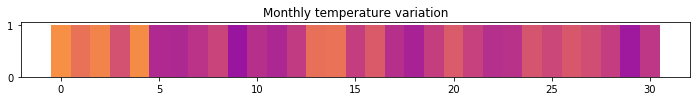

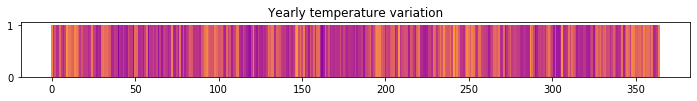

In [190]:
transmat = np.array([[0.7, 0.3], 
                    [0.2, 0.8]])

start_prob = np.array([1.0, 0.0])

model = hmm.GaussianHMM(n_components=2)
model.startprob_ = start_prob 
model.transmat_ = transmat 
model.means_ = np.array([[20],[14]])
model.covars_ = np.array([[5],[3]])

X, Z = model.sample(20)

state2color = {} 
state2color[0] = 'S'
state2color[1] = 'C'
weather = [state2color[x] for x in Z]

degrees = [item for sublist in X for item in sublist]

combined_weather = [0]*len(weather)
for i,w in enumerate(weather):
    combined_weather[i] = w + str(int(degrees[i]))

print(', '.join(combined_weather))

X, Z = model.sample(31)
degrees = [item for sublist in X for item in sublist]
x = np.arange(len(degrees))
y = np.ones(len(degrees))
degrees = normalize(degrees)
cmap=plt.cm.get_cmap('plasma')
colors = [cmap.colors[int(256*len(degrees)/2*x)] for x in degrees]
plt.figure(figsize=(12,1))
plt.title('Monthly temperature variation')
plt.bar(x,y, color=colors, width=1)


X, Z = model.sample(365)
degrees = [item for sublist in X for item in sublist]
x = np.arange(len(degrees))
y = np.ones(len(degrees))
degrees = normalize(degrees)
cmap=plt.cm.get_cmap('plasma')
colors = [cmap.colors[int(256*len(degrees)/2*x)] for x in degrees]
plt.figure(figsize=(12,1))
plt.title('Yearly temperature variation')
plt.bar(x,y, color=colors, width=1);

# QUESTION 2E (Advanced) 1 point 


Show how you can learn the HMM for the continuous random variable case. Use 10000 samples 
generated using the code you wrote for the previous question. 

The learn the parameters of an HMM using a Gaussian HMM: 
https://hmmlearn.readthedocs.io/en/latest/api.html#hmmlearn.hmm.GaussianHMM


Compare the original transition and sensor model with the estimated transition and sensor model similarly to what was done for the multinomial HMM with the discrete sensor model. 

In [214]:
transmat = np.array([[0.7, 0.3], 
                    [0.2, 0.8]])

start_prob = np.array([1.0, 0.0])

model = hmm.GaussianHMM(n_components=2,algorithm = 'viterbi')
model.startprob_ = start_prob 
model.transmat_ = transmat 
model.means_ = np.array([[20],[14]])
model.covars_ = np.array([[5],[3]])

X,Z = model.sample(10000)

estimated_model = hmm.GaussianHMM(n_components=2, n_iter=10000).fit(X)

print("Transition matrix")
print("Estimated model:")
print(estimated_model.transmat_)
print("Original model:")
print(model.transmat_)

print("\nMean")
print("Estimated model:")
print(estimated_model.means_)
print("Original model:")
print(model.means_)

print("\nStandard deviation")
print("Estimated model:")
print(estimated_model.covars_)
print("Original model:")
print(model.covars_)

Transition matrix
Estimated model:
[[0.69921079 0.30078921]
 [0.20716557 0.79283443]]
Original model:
[[0.7 0.3]
 [0.2 0.8]]

Mean
Estimated model:
[[19.91391243]
 [13.94711844]]
Original model:
[[20]
 [14]]

Standard deviation
Estimated model:
[[[5.36822097]]

 [[3.00930472]]]
Original model:
[[[5]]

 [[3]]]
